In [81]:
import matplotlib.pyplot as plt
import os
import pandas as pd

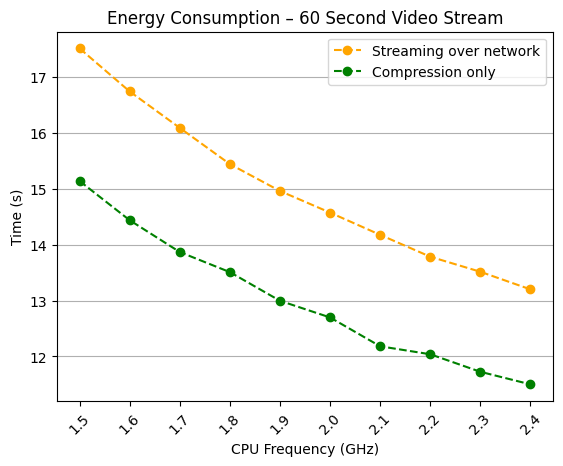

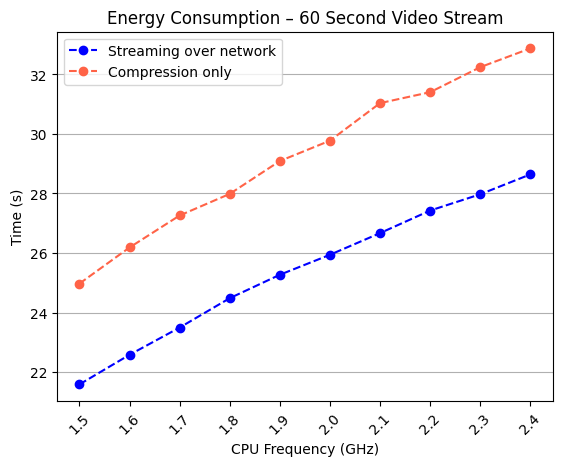

In [82]:
network_time = {
    "1.5": 17.50975646972656,
    "1.6": 16.73928189277649,
    "1.7": 16.08769166469574,
    "1.8": 15.439577865600587,
    "1.9": 14.958814096450805,
    "2.0": 14.572128748893737,
    "2.1": 14.174365949630737,
    "2.2": 13.783078932762146,
    "2.3": 13.513673686981202,
    "2.4": 13.19862403869629 
}
network_fps = {
    "1.5": 21.587964438771145,
    "1.6": 22.58161386021694,
    "1.7": 23.4962235650946,
    "1.8": 24.48253464508151,
    "1.9": 25.269382824249817,
    "2.0": 25.93993002077314,
    "2.1": 26.667859524950916,
    "2.2": 27.424931819950647,
    "2.3": 27.97166845638411,
    "2.4": 28.639348987573513
}
local_time = {
    "1.5": 15.137153387069702,
    "1.6": 14.435765433311463,
    "1.7": 13.866909742355347,
    "1.8": 13.507427048683166,
    "1.9": 12.99503161907196,
    "2.0": 12.696708154678344,
    "2.1": 12.180910849571228,
    "2.2": 12.038407444953918,
    "2.3": 11.724675059318542,
    "2.4": 11.499709796905517
}
local_fps = {
    "1.5": 24.97167005805009,
    "1.6": 26.184964125819096,
    "1.7": 27.25913754565156,
    "1.8": 27.984604220894244,
    "1.9": 29.088040035642088,
    "2.0": 29.771496311878185,
    "2.1": 31.032162099216556,
    "2.2": 31.399502112585868,
    "2.3": 32.239699444768235,
    "2.4": 32.87039470350086
}

freqs = list(network_time.keys())

plt.plot(freqs, list(network_time.values()), 'o--', color='orange', label='Streaming over network')
plt.plot(freqs, list(local_time.values()), 'go--', label='Compression only')
plt.title('Energy Consumption – 60 Second Video Stream')
plt.xticks(rotation=45)
plt.xlabel('CPU Frequency (GHz)')
plt.ylabel('Time (s)')
plt.grid(True, axis='y')
plt.legend()
plt.show()

plt.plot(freqs, list(network_fps.values()), 'o--', color='blue', label='Streaming over network')
plt.plot(freqs, list(local_fps.values()), 'o--', color='tomato', label='Compression only')
plt.title('Energy Consumption – 60 Second Video Stream')
plt.xticks(rotation=45)
plt.xlabel('CPU Frequency (GHz)')
plt.ylabel('Time (s)')
plt.grid(True, axis='y')
plt.legend()
plt.show()

In [83]:
def get_energy_from_experiment(file_path):
    df = pd.read_excel(file_path, skiprows=range(0, 4))
    df.columns = df.columns.str.strip()

    # exp_name = file_name.split('.')[0]
    df['W'] = df['Voltage  (V)'] * df['Current  (A)']
    df.drop(columns=['Time （s）', 'Voltage  (V)', 'Current  (A)'], inplace=True)

    df = df.truncate(before=15, after=75)
    return (df['W'].mean() * len(df['W']) / 3600)

In [84]:
for file in sorted(os.listdir('firefighter2-data/client')):
    path = 'firefighter2-data/client/' + file
    print(f'{file}: {round(get_energy_from_experiment(path), 3)}')

location1-1_5ghz-idle.xlsx: 0.049
location1-1_5ghz.xlsx: 0.065
location1-1_8ghz-idle.xlsx: 0.056
location1-1_8ghz.xlsx: 0.079
location1-2_1ghz-idle.xlsx: 0.063
location1-2_1ghz.xlsx: 0.089
location1-2_4ghz-idle.xlsx: 0.067
location1-2_4ghz.xlsx: 0.1
location2-1_5ghz.xlsx: 0.066
location2-1_8ghz.xlsx: 0.08
location2-2_1ghz.xlsx: 0.091
location2-2_4ghz.xlsx: 0.102
location3-1_5ghz.xlsx: 0.067
location3-1_8ghz.xlsx: 0.08
location3-2_1ghz.xlsx: 0.092
location3-2_4ghz.xlsx: 0.103


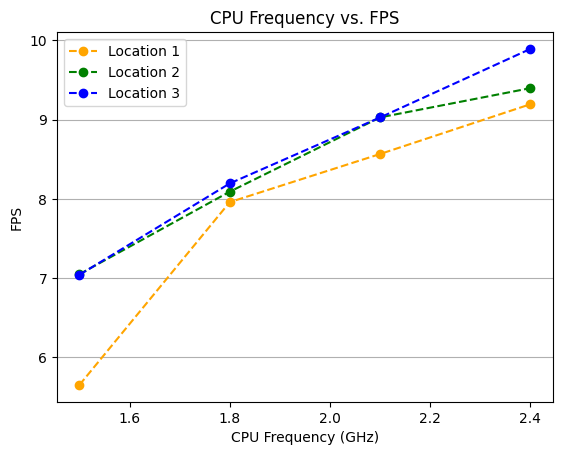

In [85]:
cpu_freq = [1.5, 1.8, 2.1, 2.4]
loc1_fps = [5.653, 7.959, 8.566, 9.194]
loc2_fps = [7.050, 8.091, 9.028, 9.397]
loc3_fps = [7.042, 8.195, 9.027, 9.892]

plt.plot(cpu_freq, loc1_fps, 'o--', color='orange', label='Location 1')
plt.plot(cpu_freq, loc2_fps, 'go--', label='Location 2')
plt.plot(cpu_freq, loc3_fps, 'bo--', label='Location 3')
plt.title('CPU Frequency vs. FPS')
plt.xlabel('CPU Frequency (GHz)')
plt.ylabel('FPS')
plt.grid(True, axis='y')
plt.legend()
plt.show()

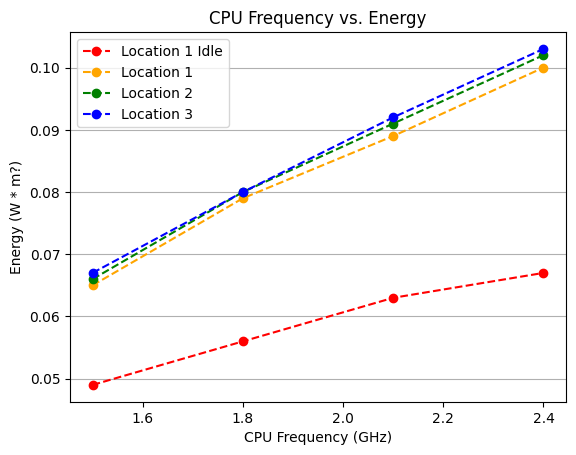

In [86]:
cpu_freq = [1.5, 1.8, 2.1, 2.4]
loc1_idle_energy = [0.049, 0.056, 0.063, 0.067]
loc1_energy = [0.065, 0.079, 0.089, 0.100]
loc2_energy = [0.066, 0.080, 0.091, 0.102]
loc3_energy = [0.067, 0.080, 0.092, 0.103]

plt.plot(cpu_freq, loc1_idle_energy, 'ro--', label='Location 1 Idle')
plt.plot(cpu_freq, loc1_energy, 'o--', color='orange', label='Location 1')
plt.plot(cpu_freq, loc2_energy, 'go--', label='Location 2')
plt.plot(cpu_freq, loc3_energy, 'bo--', label='Location 3')
plt.title('CPU Frequency vs. Energy')
plt.xlabel('CPU Frequency (GHz)')
plt.ylabel('Energy (W * m?)')
plt.grid(True, axis='y')
plt.legend()
plt.show()

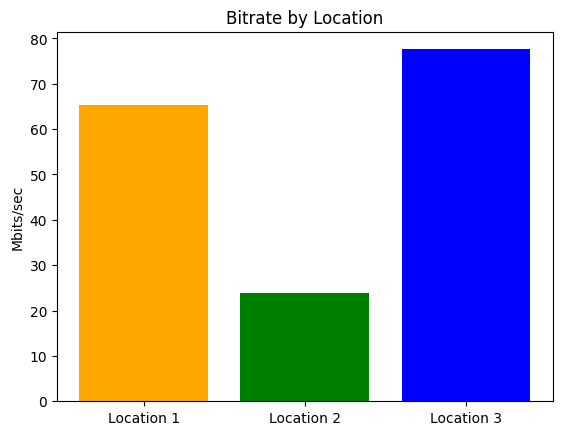

In [98]:
categories = ['Location 1', 'Location 2', 'Location 3']
values = [65.3, 23.8, 77.6]

plt.bar(categories, values, color=['orange', 'green', 'blue'])
plt.title('Bitrate by Location')
plt.ylabel('Mbits/sec')
plt.show()